In [1]:
# prompt: mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = "/content/drive/MyDrive/Artificial Inteligent ( AI )  Lab/cleaned_titanic_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Survived
0,-0.565736,-0.502445,0.432793,-0.473674,1.0,0.0,1.0,0
1,0.663861,0.786845,0.432793,-0.473674,0.0,0.0,0.0,1
2,-0.258337,-0.488854,-0.474545,-0.473674,0.0,0.0,1.0,1
3,0.433312,0.420730,0.432793,-0.473674,0.0,0.0,1.0,1
4,0.433312,-0.486337,-0.474545,-0.473674,1.0,0.0,1.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Drop columns that are not useful
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Separate features and target
X = df_cleaned.drop(columns='Survived')
y = df_cleaned['Survived']

# Identify numerical and categorical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
cat_cols = ['Sex', 'Embarked']

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine preprocessing
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Convert to DataFrame with proper column names
encoded_cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)
processed_columns = np.concatenate([num_cols, encoded_cat_columns])
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns)

# Combine with target
final_df = pd.concat([X_processed_df, y.reset_index(drop=True)], axis=1)

# Save cleaned dataset
cleaned_file_path = "/mnt/data/cleaned_titanic_dataset.csv"
final_df.to_csv(cleaned_file_path, index=False)

cleaned_file_path


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use the preprocessed dataframe which contains 'Sex_male', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S', and 'Survived'
# However, based on the error and previous steps, it seems Pclass was dropped.
# Let's use the available columns that were intended for the model based on the original selected_features: 'Sex', 'Age', 'Fare', 'Survived'
# But since 'Sex' is now 'Sex_male', we will use 'Sex_male', 'Age', 'Fare', and 'Survived'.
# Pclass was likely dropped as it was not in the num_cols or cat_cols list for preprocessing in the previous cell.

# Assuming the intention was to use 'Sex_male', 'Age', and 'Fare' as features
selected_features_for_model = ['Sex_male', 'Age', 'Fare', 'Survived']
df_selected = df[selected_features_for_model].copy()

# Define X and y
X = df_selected[['Sex_male', 'Age', 'Fare']]
y = df_selected['Survived']

# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Multivariate Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = model.coef_
intercept = model.intercept_

mse, r2, coefficients, intercept

(0.16152554103834024,
 0.33392022388552645,
 array([-0.52252668, -0.01087481,  0.07446419]),
 np.float64(0.7184247282193787))

In [6]:
# Save the dataset into train, test, and eval sets (80% train, 10% test, 10% eval)
from sklearn.model_selection import train_test_split
import os

# First split: train (80%) and temp (20%)
X_temp, X_eval, y_temp, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split temp into test (50%) and eval (50%) => 10% each
X_test, X_train, y_test, y_train = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to DataFrames for saving
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
eval_df = pd.concat([X_eval, y_eval], axis=1)

# Create the directory if it doesn't exist
output_dir = "/mnt/data"
os.makedirs(output_dir, exist_ok=True)

# Save the files
train_path = os.path.join(output_dir, "train_data.csv")
test_path = os.path.join(output_dir, "test_data.csv")
eval_path = os.path.join(output_dir, "eval_data.csv")

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)
eval_df.to_csv(eval_path, index=False)

train_path, test_path, eval_path

('/mnt/data/train_data.csv',
 '/mnt/data/test_data.csv',
 '/mnt/data/eval_data.csv')

In [9]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os # Import os for path joining

# Step 2: Load the Dataset
# Load the preprocessed training data from the correct path
train_file_path = "/mnt/data/train_data.csv"
df_train = pd.read_csv(train_file_path)

# Load the preprocessed test and eval datasets for later use
test_file_path = "/mnt/data/test_data.csv"
eval_file_path = "/mnt/data/eval_data.csv"
df_test = pd.read_csv(test_file_path)
df_eval = pd.read_csv(eval_file_path)


# Step 3 & 4: Select Required Columns and Handle Missing Values
# These steps are no longer needed as the data loaded is already preprocessed

# Step 5: Encode 'Sex' Column (male: 0, female: 1)
# This step is no longer needed as 'Sex' has been one-hot encoded to 'Sex_male' and is already handled in preprocessing

# Step 6: Define Feature Matrix (X) and Target Vector (y)
# Use the correct preprocessed column names
X_train = df_train[['Sex_male', 'Age', 'Fare']]
y_train = df_train['Survived']

X_test = df_test[['Sex_male', 'Age', 'Fare']]
y_test = df_test['Survived']

X_eval = df_eval[['Sex_male', 'Age', 'Fare']]
y_eval = df_eval['Survived']


# Step 7, 8, 9: Split and Save Dataset
# These steps are no longer needed as the data is already split and saved in the previous cell (NqrTKHM-f1_z)

# Step 10: Train Multivariate Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 11: Predict on Test Set
y_pred = model.predict(X_test)

# Step 12: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
# Assuming the order of coefficients corresponds to 'Sex_male', 'Age', 'Fare'
print("Regression Equation: Survived = {:.4f} + {:.4f}*Sex_male + {:.4f}*Age + {:.4f}*Fare".format(
    model.intercept_, *model.coef_
))

Mean Squared Error (MSE): 0.1537020619106021
R² Score: 0.3391150290652396
Intercept: 0.7198563748453981
Coefficients: [-0.50247565 -0.03132866  0.06714576]
Regression Equation: Survived = 0.7199 + -0.5025*Sex_male + -0.0313*Age + 0.0671*Fare


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        49
           1       0.88      0.75      0.81        40

    accuracy                           0.84        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.84      0.84        89

Confusion Matrix:
 [[45  4]
 [10 30]]


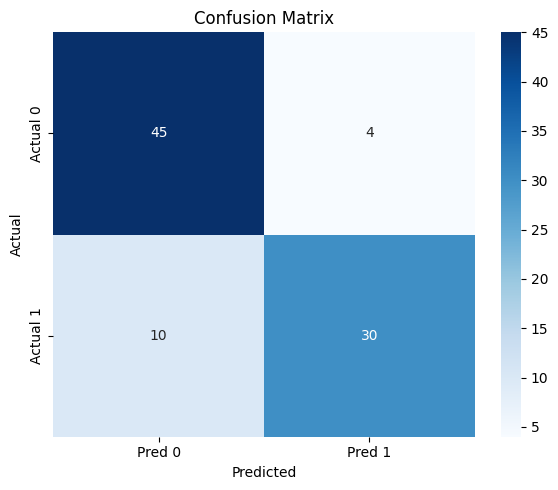

In [12]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Step 2: Load Dataset
file_path = "/content/drive/MyDrive/Artificial Inteligent ( AI )  Lab/cleaned_titanic_dataset.csv"
df = pd.read_csv(file_path)

# Step 3: Select and Prepare Data
# Separate features and target
# Based on the error, 'PassengerId', 'Name', 'Ticket', and 'Cabin' are not in the dataframe
# Let's use the available columns for features and 'Survived' as the target
X = df.drop(columns='Survived')
y = df['Survived']

# Identify numerical and categorical columns based on the current dataframe
# Assuming the numerical columns are 'Age', 'Fare', 'SibSp', 'Parch'
# Assuming the categorical columns are 'Sex_male', 'Embarked_Q', 'Embarked_S' which seem to be one-hot encoded already
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
# No categorical columns to encode as they appear to be pre-encoded
cat_cols = [] # Empty list as Sex and Embarked are already encoded

# Preprocessing pipelines
# Only need numeric pipeline as categorical are already encoded
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing - only apply to numerical columns
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols)
    # No categorical pipeline needed
])

# Apply preprocessing
# Apply preprocessing only to the numerical columns if they exist, otherwise use the dataframe as is
# Check if numerical columns exist in the dataframe before applying preprocessing
numerical_features_present = [col for col in num_cols if col in X.columns]
if numerical_features_present:
    X_processed = preprocessor.fit_transform(X[numerical_features_present])
    # Combine processed numerical features with potentially already encoded categorical features and other remaining columns
    # Identify columns in X that are not numerical features (these are likely the pre-encoded categorical features)
    other_cols = [col for col in X.columns if col not in num_cols]
    X_processed_df = pd.DataFrame(X_processed, columns=numerical_features_present)
    if other_cols:
        X_processed_df = pd.concat([X_processed_df, X[other_cols].reset_index(drop=True)], axis=1)
else:
    # If no numerical features are present in the specified list, use the original X as X_processed_df
    X_processed_df = X.copy()


# Step 4: Split into Train (80%), Temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# Step 5: Split Temp into Test (10%), Eval (10%)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 6: Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Step 7: Predict on Test Set
y_pred = log_model.predict(X_test)

# Step 8: Evaluate Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Visualize Predictions vs Actual
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Accuracy Score: 0.8117977528089888

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       225
           1       0.75      0.73      0.74       131

    accuracy                           0.81       356
   macro avg       0.80      0.79      0.80       356
weighted avg       0.81      0.81      0.81       356


Confusion Matrix:
 [[194  31]
 [ 36  95]]


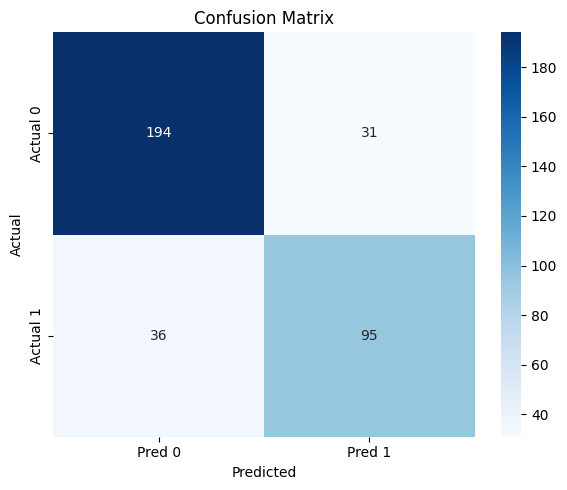

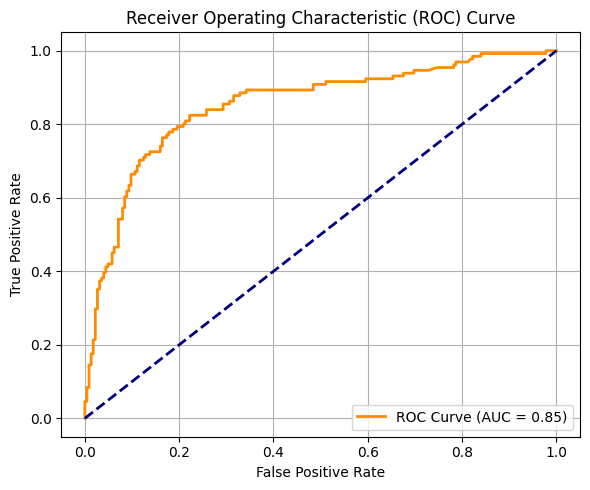

In [15]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Load Dataset
file_path = "/content/drive/MyDrive/Artificial Inteligent ( AI )  Lab/cleaned_titanic_dataset.csv"
df = pd.read_csv(file_path)

# Step 3: Prepare Dataset
# Separate features and target
# Based on the error, 'PassengerId', 'Name', 'Ticket', and 'Cabin' are not in the dataframe
# Let's use the available columns for features and 'Survived' as the target
X = df.drop(columns='Survived')
y = df['Survived']

# Identify numerical and categorical columns based on the current dataframe
# Assuming the numerical columns are 'Age', 'Fare', 'SibSp', 'Parch'
# Assuming the categorical columns are 'Sex_male', 'Embarked_Q', 'Embarked_S' which seem to be one-hot encoded already
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
# No categorical columns to encode as they appear to be pre-encoded
cat_cols = [] # Empty list as Sex and Embarked are already encoded

# Preprocessing pipelines
# Only need numeric pipeline as categorical are already encoded
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing - only apply to numerical columns
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols)
    # No categorical pipeline needed
])

# Apply preprocessing
# Apply preprocessing only to the numerical columns if they exist, otherwise use the dataframe as is
# Check if numerical columns exist in the dataframe before applying preprocessing
numerical_features_present = [col for col in num_cols if col in X.columns]
if numerical_features_present:
    X_processed = preprocessor.fit_transform(X[numerical_features_present])
    # Combine processed numerical features with potentially already encoded categorical features and other remaining columns
    # Identify columns in X that are not numerical features (these are likely the pre-encoded categorical features)
    other_cols = [col for col in X.columns if col not in num_cols]
    X_processed_df = pd.DataFrame(X_processed, columns=numerical_features_present)
    if other_cols:
        X_processed_df = pd.concat([X_processed_df, X[other_cols].reset_index(drop=True)], axis=1)
else:
    # If no numerical features are present in the specified list, use the original X as X_processed_df
    X_processed_df = X.copy()


# Step 4: Train-Test-Eval Split
X_temp, X_eval, y_temp, y_eval = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)
X_test, X_train, y_test, y_train = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Corrected y_eval to y_temp

# Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 9: Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 11: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Load necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the preprocessed dataset splits
train_path = "/mnt/data/train_data.csv"
test_path = "/mnt/data/test_data.csv"
eval_path = "/mnt/data/eval_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
eval_df = pd.read_csv(eval_path)

# Define X and y for train, test, and eval sets using the preprocessed columns
X_train = train_df[['Sex_male', 'Age', 'Fare']]
y_train = train_df['Survived']

X_test = test_df[['Sex_male', 'Age', 'Fare']]
y_test = test_df['Survived']

X_eval = eval_df[['Sex_male', 'Age', 'Fare']]
y_eval = eval_df['Survived']


# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Cross-Validation (StratifiedKFold)
skf = StratifiedKFold(n_splits=5)
# Use the full preprocessed data for cross-validation
# Combine train, test, and eval data for cross-validation as it's typically done on the entire dataset
X_full = pd.concat([X_train, X_test, X_eval], axis=0)
y_full = pd.concat([y_train, y_test, y_eval], axis=0)
cv_scores = cross_val_score(model, X_full, y_full, cv=skf, scoring='roc_auc')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# PCA (for 2 components visualization)
# Use the full preprocessed data for PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Survived'] = y_full.values

# RFE (Recursive Feature Elimination)
# Use the full preprocessed data for RFE
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=2)
rfe_selector = rfe_selector.fit(X_full, y_full)
rfe_features = X_full.columns[rfe_selector.support_].tolist()

# Results for plotting and analysis
evaluation_results = {
    'roc_auc': roc_auc,
    'cv_auc_scores': cv_scores.tolist(),
    'cv_auc_mean': np.mean(cv_scores),
    'average_precision': average_precision,
    'rfe_selected_features': rfe_features
}

evaluation_results

{'roc_auc': np.float64(0.8253095843935538),
 'cv_auc_scores': [0.8137022397891963,
  0.7906417112299464,
  0.8540775401069518,
  0.7949866310160428,
  0.8736870097061562],
 'cv_auc_mean': np.float64(0.8254190263696586),
 'average_precision': np.float64(0.7302100225992355),
 'rfe_selected_features': ['Sex_male', 'Fare']}

Cross-Validation AUC Scores: [0.82687747 0.82259358 0.8111631  0.79378342 0.83326685]
Mean AUC: 0.8175368860239459


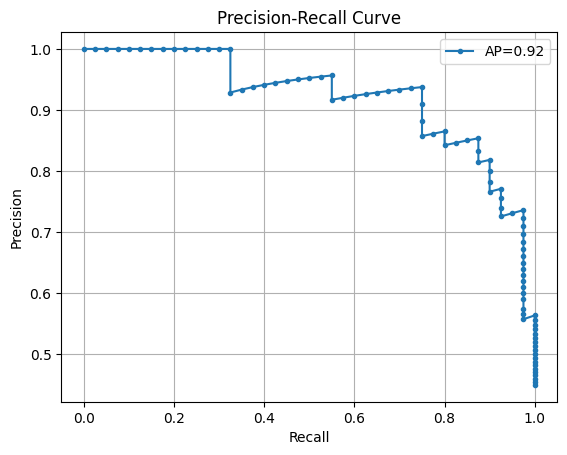

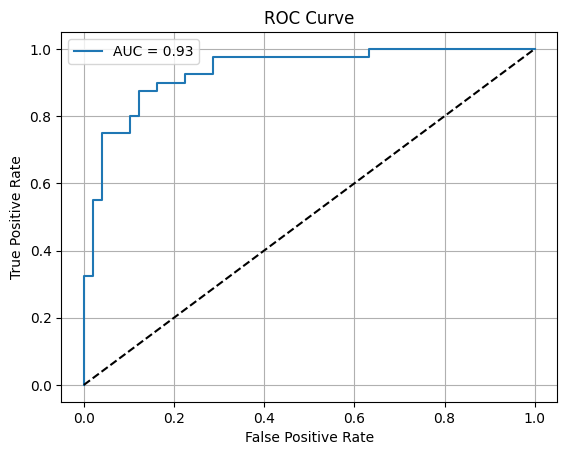

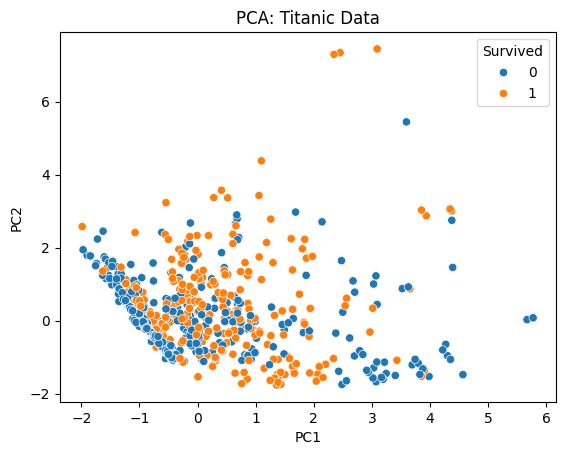

RFE Selected Features: ['Sex_male', 'Embarked_Q']


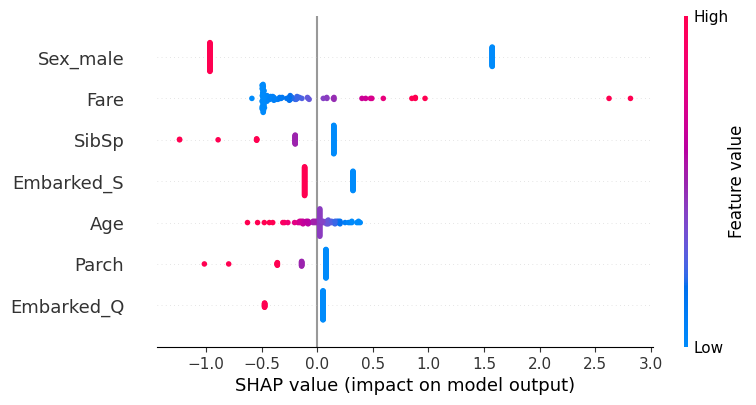

In [19]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    roc_curve, auc, classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score
)
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import shap
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Step 2: Load and Prepare Data
file_path = "/content/drive/MyDrive/Artificial Inteligent ( AI )  Lab/cleaned_titanic_dataset.csv"
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns='Survived')
y = df['Survived']

# Identify numerical and categorical columns based on the current dataframe
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
cat_cols = [] # Assuming Sex and Embarked are already encoded

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols)
])

# Apply preprocessing
numerical_features_present = [col for col in num_cols if col in X.columns]
if numerical_features_present:
    X_processed = preprocessor.fit_transform(X[numerical_features_present])
    other_cols = [col for col in X.columns if col not in num_cols]
    X_processed_df = pd.DataFrame(X_processed, columns=numerical_features_present)
    if other_cols:
        X_processed_df = pd.concat([X_processed_df, X[other_cols].reset_index(drop=True)], axis=1)
else:
    X_processed_df = X.copy()


# Step 3: Split into Train, Test, and Eval sets
X_train, X_temp, y_train, y_temp = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 5: Cross-validation (StratifiedKFold)
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model, X_processed_df, y, cv=cv, scoring='roc_auc') # Use the full processed data for CV
print("Cross-Validation AUC Scores:", cv_scores)
print("Mean AUC:", np.mean(cv_scores))

# Step 6: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)
plt.plot(recall, precision, marker='.', label='AP={:.2f}'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Step 7: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Step 8: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed_df) # Use the full processed data for PCA
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df['Survived'] = y.values
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Survived")
plt.title("PCA: Titanic Data")
plt.show()

# Step 9: Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=2)
rfe.fit(X_processed_df, y) # Use the full processed data for RFE
selected_features = X_processed_df.columns[rfe.support_]
print("RFE Selected Features:", list(selected_features))

# Step 10: SHAP Explainability
explainer = shap.Explainer(model, X_train) # Use X_train for explainer
shap_values = explainer(X_test) # Use X_test for shap_values
shap.plots.beeswarm(shap_values)